In [1]:
import matplotlib.pyplot as plt
import os, re, pickle
import scipy.io
from collections import defaultdict
import numpy as np

import pandas as pd

def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def nested_dict(n):
    if n == 1:
        return defaultdict(lambda: np.ndarray(0))
    else:
        return defaultdict(lambda: nested_dict(n-1))

### Whole-Image Human Attention Maps
For the definition of Explorative vs Focused groups, see Mary's results at:
https://docs.google.com/presentation/d/1b7mX8MR4Q-D1JT0DY1LpjvM6y8iggoAdjS_4Vv8sNag/edit

In [2]:
human_attention_path = {
    "DET":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/240107_DET_excluded_resized/attention_maps',
    "DET-GrpF":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/240107_DET_excluded_resized/grp2',
    "DET-GrpE":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/240107_DET_excluded_resized/grp1',
    "EXP":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231222_EXP_excluded_cleaned_resized/attention_maps',
    "EXP-GrpF":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231222_EXP_excluded_cleaned_resized/grp2',
    "EXP-GrpE":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231222_EXP_excluded_cleaned_resized/grp1',
    "PV":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231221_PV_resized/attention_maps',
    "PV-GrpF":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231221_PV_resized/grp2',
    "PV-GrpE":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/attention_maps/231221_PV_resized/grp1',
}

# Attention Type, Image Idex
human_attention = {
    "DET":defaultdict(),
    "DET-GrpF":defaultdict(),
    "DET-GrpE":defaultdict(),
    "EXP":defaultdict(),
    "EXP-GrpF":defaultdict(),
    "EXP-GrpE":defaultdict(),
    "PV":defaultdict(),
    "PV-GrpF":defaultdict(),
    "PV-GrpE":defaultdict(),
}

for type, path_by_type in human_attention_path.items():
    for file in os.listdir(path_by_type):
        img_idx = file.replace('_GSmo_21.mat','')
        mat = scipy.io.loadmat(os.path.join(path_by_type,file))
        human_attention[type][img_idx] = mat['output_map_norm']

KeyboardInterrupt: 

In [6]:
for type, t in human_attention.items():
    print(f"{type} {len(t)}")
    for img in t:
        if img not in human_attention['DET'].keys():
            print(img)

DET 160
DET-GrpF 160
DET-GrpE 160
EXP 160
EXP-GrpF 160
EXP-GrpE 160
PV 160
PV-GrpF 160
PV-GrpE 160


In [5]:
failed_imgs = []

In [51]:
xai_saliency_path = {
    "FullGradCAM":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/xai_saliency_maps/fullgradcamraw',
    "ODAM":'/mnt/h/OneDrive - The University Of Hong Kong/mscoco/xai_saliency_maps/odam',
}

# Type, Category, Layer, Image
xai_saliency_maps = {
    "FullGradCAM":defaultdict(defaultdict),
    "ODAM":defaultdict(defaultdict),
}

for type, path_by_type in xai_saliency_path.items():
    for dir in os.listdir(path_by_type):
        layer_num = int(re.findall(r"F\d+",dir)[-1].replace('F',''))

        for file in os.listdir(os.path.join(path_by_type,dir)):
            if '.mat' not in file: continue
            img_idx = file.replace('-res.png.mat','')
            try:
                mat = scipy.io.loadmat(os.path.join(path_by_type,dir,file))
                if mat['masks_ndarray'].sum()==1.5 and mat['masks_ndarray'][0,0]==1 and mat['masks_ndarray'][1,1]==0.5:
                    failed_imgs.append(img_idx)
                    continue
                elif not np.any(mat['masks_ndarray']):
                    failed_imgs.append(img_idx)
                    continue
                xai_saliency_maps[type][layer_num][img_idx] = mat['masks_ndarray']
            except:
                print(f"{type}\t{layer_num}\t{file}")

ODAM	3	remote_476810-res.png.mat


In [56]:
print(set(failed_imgs))
print(len(set(failed_imgs)))

{'potted plant_473219', 'bench_350607', 'truck_295420', 'toaster_232348', 'kite_405279', 'toothbrush_218439', 'snowboard_425906', 'car_227511', 'traffic light_453841', 'hair drier_239041', 'hair drier_178028', 'toaster_453302', 'mouse_513688', 'spoon_88040', 'scissors_340930', 'handbag_383842'}
16


In [57]:
for type, t in xai_saliency_maps.items():
        for layer, l in t.items():
                print(f"{type} Layer {layer} {len(l)}")
                for img in l:
                        if img not in human_attention['DET']: print(img)

FullGradCAM Layer 10 150
FullGradCAM Layer 11 150
FullGradCAM Layer 12 150
FullGradCAM Layer 13 150
FullGradCAM Layer 14 150
FullGradCAM Layer 15 150
FullGradCAM Layer 16 150
FullGradCAM Layer 17 150
FullGradCAM Layer 1 138
FullGradCAM Layer 2 138
FullGradCAM Layer 3 150
FullGradCAM Layer 4 150
FullGradCAM Layer 5 150
FullGradCAM Layer 6 150
FullGradCAM Layer 7 150
FullGradCAM Layer 8 150
FullGradCAM Layer 9 149
ODAM Layer 10 146
ODAM Layer 11 146
ODAM Layer 12 146
ODAM Layer 13 146
ODAM Layer 14 146
ODAM Layer 15 146
ODAM Layer 16 146
ODAM Layer 17 146
ODAM Layer 1 136
ODAM Layer 2 135
ODAM Layer 3 145
ODAM Layer 4 146
ODAM Layer 5 146
ODAM Layer 6 146
ODAM Layer 7 146
ODAM Layer 8 146
ODAM Layer 9 146


## Similarity Analysis

In [61]:
zero_pcc = {
    "DET vs FullGradCam":defaultdict(list),
    "DET-GrpF vs FullGradCam":defaultdict(list),
    "DET-GrpE vs FullGradCam":defaultdict(list),
    "EXP vs ODAM":defaultdict(list),
    "EXP-GrpF vs ODAM":defaultdict(list),
    "EXP-GrpE vs ODAM":defaultdict(list),
    "PV vs FullGradCam":defaultdict(list),
    "PV-GrpF vs FullGradCam":defaultdict(list),
    "PV-GrpE vs FullGradCam":defaultdict(list),
}

negative_pcc = {
    "DET vs FullGradCam":defaultdict(list),
    "DET-GrpF vs FullGradCam":defaultdict(list),
    "DET-GrpE vs FullGradCam":defaultdict(list),
    "EXP vs ODAM":defaultdict(list),
    "EXP-GrpF vs ODAM":defaultdict(list),
    "EXP-GrpE vs ODAM":defaultdict(list),
    "PV vs FullGradCam":defaultdict(list),
    "PV-GrpF vs FullGradCam":defaultdict(list),
    "PV-GrpE vs FullGradCam":defaultdict(list),
}

In [62]:
PCC_all = {
    "DET vs FullGradCam":defaultdict(defaultdict),
    "DET-GrpF vs FullGradCam":defaultdict(defaultdict),
    "DET-GrpE vs FullGradCam":defaultdict(defaultdict),
    "EXP vs ODAM":defaultdict(defaultdict),
    "EXP-GrpF vs ODAM":defaultdict(defaultdict),
    "EXP-GrpE vs ODAM":defaultdict(defaultdict),
    "PV vs FullGradCam":defaultdict(defaultdict),
    "PV-GrpF vs FullGradCam":defaultdict(defaultdict),
    "PV-GrpE vs FullGradCam":defaultdict(defaultdict),
}
RMSE_all = {
    "DET vs FullGradCam":defaultdict(defaultdict),
    "DET-GrpF vs FullGradCam":defaultdict(defaultdict),
    "DET-GrpE vs FullGradCam":defaultdict(defaultdict),
    "EXP vs ODAM":defaultdict(defaultdict),
    "EXP-GrpF vs ODAM":defaultdict(defaultdict),
    "EXP-GrpE vs ODAM":defaultdict(defaultdict),
    "PV vs FullGradCam":defaultdict(defaultdict),
    "PV-GrpF vs FullGradCam":defaultdict(defaultdict),
    "PV-GrpE vs FullGradCam":defaultdict(defaultdict),
}

for layer in range(1,18):
    for img in human_attention['DET'].keys():
        if img in failed_imgs: continue

        if img in xai_saliency_maps['FullGradCAM'][layer].keys():
            # DET vs FullGradCam
            PCC_all['DET vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET'][img].flatten())[0,1]
            RMSE_all['DET vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET'][img].flatten())
            if PCC_all['DET vs FullGradCam'][layer][img] == 0:
                zero_pcc['DET vs FullGradCam'][layer].append(img)
            elif PCC_all['DET vs FullGradCam'][layer][img] < 0:
                negative_pcc['DET vs FullGradCam'][layer].append(img)

            # DET-GrpF vs FullGradCam
            PCC_all['DET-GrpF vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET-GrpF'][img].flatten())[0,1]
            RMSE_all['DET-GrpF vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET-GrpF'][img].flatten())
            if PCC_all['DET-GrpF vs FullGradCam'][layer][img] == 0:
                zero_pcc['DET-GrpF vs FullGradCam'][layer].append(img)
            elif PCC_all['DET-GrpF vs FullGradCam'][layer][img] < 0:
                negative_pcc['DET-GrpF vs FullGradCam'][layer].append(img)

            # DET-GrpE vs FullGradCam
            PCC_all['DET-GrpE vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET-GrpE'][img].flatten())[0,1]
            RMSE_all['DET-GrpE vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['DET-GrpE'][img].flatten())
            if PCC_all['DET-GrpE vs FullGradCam'][layer][img] == 0:
                zero_pcc['DET-GrpE vs FullGradCam'][layer].append(img)
            elif PCC_all['DET-GrpE vs FullGradCam'][layer][img] < 0:
                negative_pcc['DET-GrpE vs FullGradCam'][layer].append(img)

            # PV vs FullGradCam
            PCC_all['PV vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV'][img].flatten())[0,1]
            RMSE_all['PV vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV'][img].flatten())
            if PCC_all['PV vs FullGradCam'][layer][img] == 0:
                zero_pcc['PV vs FullGradCam'][layer].append(img)
            elif PCC_all['PV vs FullGradCam'][layer][img] < 0:
                negative_pcc['PV vs FullGradCam'][layer].append(img)

            # PV-GrpF vs FullGradCam
            PCC_all['PV-GrpF vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV-GrpF'][img].flatten())[0,1]
            RMSE_all['PV-GrpF vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV-GrpF'][img].flatten())
            if PCC_all['PV-GrpF vs FullGradCam'][layer][img] == 0:
                zero_pcc['PV-GrpF vs FullGradCam'][layer].append(img)
            elif PCC_all['PV-GrpF vs FullGradCam'][layer][img] < 0:
                negative_pcc['PV-GrpF vs FullGradCam'][layer].append(img)

            # PV-GrpE vs FullGradCam
            PCC_all['PV-GrpE vs FullGradCam'][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV-GrpE'][img].flatten())[0,1]
            RMSE_all['PV-GrpE vs FullGradCam'][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][layer][img].flatten(), human_attention['PV-GrpE'][img].flatten())
            if PCC_all['PV-GrpE vs FullGradCam'][layer][img] == 0:
                zero_pcc['PV-GrpE vs FullGradCam'][layer].append(img)
            elif PCC_all['PV-GrpE vs FullGradCam'][layer][img] < 0:
                negative_pcc['PV-GrpE vs FullGradCam'][layer].append(img)

        if img in xai_saliency_maps['ODAM'][layer].keys():
            # EXP vs ODAM
            PCC_all['EXP vs ODAM'][layer][img] = np.corrcoef(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP'][img].flatten())[0,1]
            RMSE_all['EXP vs ODAM'][layer][img] = RMSE(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP'][img].flatten())
            if PCC_all['EXP vs ODAM'][layer][img] == 0:
                zero_pcc['EXP vs ODAM'][layer].append(img)
            elif PCC_all['EXP vs ODAM'][layer][img] < 0:
                negative_pcc['EXP vs ODAM'][layer].append(img)

            # EXP-GrpF vs ODAM
            PCC_all['EXP-GrpF vs ODAM'][layer][img] = np.corrcoef(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP-GrpF'][img].flatten())[0,1]
            RMSE_all['EXP-GrpF vs ODAM'][layer][img] = RMSE(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP-GrpF'][img].flatten())
            if PCC_all['EXP-GrpF vs ODAM'][layer][img] == 0:
                zero_pcc['EXP-GrpF vs ODAM'][layer].append(img)
            elif PCC_all['EXP-GrpF vs ODAM'][layer][img] < 0:
                negative_pcc['EXP-GrpF vs ODAM'][layer].append(img)

            # EXP-GrpE vs ODAM
            PCC_all['EXP-GrpE vs ODAM'][layer][img] = np.corrcoef(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP-GrpE'][img].flatten())[0,1]
            RMSE_all['EXP-GrpE vs ODAM'][layer][img] = RMSE(xai_saliency_maps['ODAM'][layer][img].flatten(), human_attention['EXP-GrpE'][img].flatten())
            if PCC_all['EXP-GrpE vs ODAM'][layer][img] == 0:
                zero_pcc['EXP-GrpE vs ODAM'][layer].append(img)
            elif PCC_all['EXP-GrpE vs ODAM'][layer][img] < 0:
                negative_pcc['EXP-GrpE vs ODAM'][layer].append(img)


In [70]:
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    print(analysis)
    for layer in PCC_all[analysis]:
        print(f"Layer {layer}\t{len(PCC_all[analysis][layer])}")
        for img in set(failed_imgs):
            if img in PCC_all[analysis][layer]:
                print(img)

DET vs FullGradCam
Layer 1	133
Layer 2	134
Layer 3	144
Layer 4	144
Layer 5	144
Layer 6	144
Layer 7	144
Layer 8	144
Layer 9	144
Layer 10	144
Layer 11	144
Layer 12	144
Layer 13	144
Layer 14	144
Layer 15	144
Layer 16	144
Layer 17	144
EXP vs ODAM
Layer 1	134
Layer 2	134
Layer 3	143
Layer 4	144
Layer 5	144
Layer 6	144
Layer 7	144
Layer 8	144
Layer 9	144
Layer 10	144
Layer 11	144
Layer 12	144
Layer 13	144
Layer 14	144
Layer 15	144
Layer 16	144
Layer 17	144
PV vs FullGradCam
Layer 1	133
Layer 2	134
Layer 3	144
Layer 4	144
Layer 5	144
Layer 6	144
Layer 7	144
Layer 8	144
Layer 9	144
Layer 10	144
Layer 11	144
Layer 12	144
Layer 13	144
Layer 14	144
Layer 15	144
Layer 16	144
Layer 17	144


In [77]:
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    print(analysis)
    zero_pcc_imgs = []
    negative_pcc_imgs = []
    for layer in range(1,18):
        zero_pcc_imgs += zero_pcc[analysis][layer]
        negative_pcc_imgs += negative_pcc[analysis][layer]
    print(len(set(zero_pcc_imgs)))
    print(set(zero_pcc_imgs))
    print(len(set(negative_pcc_imgs)))
    print(set(negative_pcc_imgs))

DET vs FullGradCam
0
set()
9
{'pizza_294831', 'sheep_410428', 'banana_290619', 'mouse_68765', 'refrigerator_498463', 'microwave_207538', 'chair_190236', 'tie_244496', 'suitcase_350019'}
EXP vs ODAM
0
set()
6
{'toothbrush_160666', 'pizza_294831', 'dining table_480122', 'refrigerator_498463', 'book_472678', 'dog_331075'}
PV vs FullGradCam
0
set()
40
{'pizza_294831', 'dining table_480122', 'skateboard_229553', 'car_310072', 'refrigerator_498463', 'bottle_460929', 'carrot_130613', 'baseball bat_129945', 'knife_116206', 'keyboard_66635', 'bowl_205834', 'suitcase_350019', 'wine glass_25394', 'sink_51598', 'horse_439715', 'oven_802', 'toilet_42276', 'wine glass_146489', 'fork_243626', 'sheep_410428', 'scissors_324715', 'knife_227985', 'skis_30504', 'toilet_85576', 'broccoli_61658', 'chair_190236', 'dog_331075', 'toothbrush_160666', 'baseball glove_162415', 'apple_562059', 'couch_31735', 'mouse_68765', 'vase_521282', 'tv_104666', 'potted plant_407614', 'sports ball_22935', 'couch_29596', 'cup_

In [39]:
for layer in range(1,18):
    test = xai_saliency_maps['FullGradCAM'][layer]['bench_350607'].max()
    print(test)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [32]:
for layer in range(1,18):
    for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
        print(analysis)
        arr = np.asarray(list(PCC_all[analysis][layer].values()))
        max_idx = arr.argmax()
        max_value = arr[max_idx]
        min_idx = np.where(arr>0, arr, np.inf).argmin()
        min_value = arr[min_idx]
        print(f"Layer {layer}:\t{max_value} {min_value}")

DET vs FullGradCam
Layer 1:	0.8903853331270717 0.006800017463667347
EXP vs ODAM
Layer 1:	0.8772773514119059 0.007692171543746658
PV vs FullGradCam
Layer 1:	0.775205691298113 0.0003174294600658929
DET vs FullGradCam
Layer 2:	0.9050607604517769 0.018836695679757726
EXP vs ODAM
Layer 2:	0.9028170443832404 0.009219201423226133
PV vs FullGradCam
Layer 2:	0.8070810961801788 0.00024757358974414995
DET vs FullGradCam
Layer 3:	0.8840228811748577 0.03826053222542482
EXP vs ODAM
Layer 3:	0.85258279381842 0.02280109164006153
PV vs FullGradCam
Layer 3:	0.6604823602360468 0.00040880773783197815
DET vs FullGradCam
Layer 4:	0.7488682793478137 0.08254099822909261
EXP vs ODAM
Layer 4:	0.6769206758232659 0.015302972530957368
PV vs FullGradCam
Layer 4:	0.6229214353696256 0.004628282532951806
DET vs FullGradCam
Layer 5:	0.7036629760015847 0.03959095217853936
EXP vs ODAM
Layer 5:	0.6833529695772539 0.02375968562059439
PV vs FullGradCam
Layer 5:	0.6591833177643089 0.00013055520003109247
DET vs FullGradCam
La

In [70]:
PCC_all['EXP vs ODAM'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [78]:
pickle.dump(PCC_all, open('/mnt/h/jinhan/xai/results/mscoco/mscoco_PCC_all.pickle','wb'))
pickle.dump(RMSE_all, open('/mnt/h/jinhan/xai/results/mscoco/mscoco_RMSE_all.pickle','wb'))

In [2]:
PCC_all = pickle.load(open('/mnt/h/jinhan/xai/results/mscoco/remove_empty_saliency/mscoco_PCC_all.pickle','rb'))
RMSE_all = pickle.load(open('/mnt/h/jinhan/xai/results/mscoco/remove_empty_saliency/mscoco_PCC_all.pickle','rb'))

In [8]:
PCC_all['DET vs FullGradCam'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

## Paired-t Test
Grouped by Backbone vs Neck
Over images

In [3]:
p_values = defaultdict()

neck_pcc_all = defaultdict(lambda: defaultdict(list))
backbone_pcc_all = defaultdict(lambda: defaultdict(list))
neck_pcc = defaultdict(list)
backbone_pcc = defaultdict(list)
for analysis, d1 in PCC_all.items():
    print()
    print(analysis)
    for layer, d2 in d1.items():
        for img, pcc in d2.items():
            if layer in range(9,18):
                backbone_pcc_all[analysis][img].append(pcc)
            elif layer in range(5,9):
                neck_pcc_all[analysis][img].append(pcc)

    for img in backbone_pcc_all[analysis].keys():
        backbone_pcc[analysis].append(np.average(backbone_pcc_all[analysis][img]))
        neck_pcc[analysis].append(np.average(neck_pcc_all[analysis][img]))

    result = scipy.stats.ttest_rel(neck_pcc[analysis], backbone_pcc[analysis])
    print(f"t({len(PCC_all[analysis][12]-1)})={np.format_float_positional(result.statistic,precision=3, unique=False, fractional=False, trim='k')}, p={np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Backbone: M={np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Neck: M={np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}")

    p_values[analysis] = float(np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k'))


DET vs FullGradCam
t(144)=7.12, p=0.0000000000488
Backbone: M=0.298, std=0.0817
Neck: M=0.362, std=0.115

DET-GrpF vs FullGradCam
t(144)=6.17, p=0.00000000658
Backbone: M=0.285, std=0.0807
Neck: M=0.341, std=0.118

DET-GrpE vs FullGradCam
t(144)=8.11, p=0.000000000000205
Backbone: M=0.299, std=0.0831
Neck: M=0.368, std=0.112

EXP vs ODAM
t(144)=1.97, p=0.0504
Backbone: M=0.276, std=0.0963
Neck: M=0.292, std=0.138

EXP-GrpF vs ODAM
t(144)=2.07, p=0.0403
Backbone: M=0.262, std=0.0993
Neck: M=0.279, std=0.138

EXP-GrpE vs ODAM
t(144)=1.25, p=0.214
Backbone: M=0.278, std=0.09
Neck: M=0.288, std=0.137

PV vs FullGradCam
t(144)=-1.94, p=0.0539
Backbone: M=0.208, std=0.126
Neck: M=0.192, std=0.161

PV-GrpF vs FullGradCam
t(144)=-1.66, p=0.0983
Backbone: M=0.212, std=0.129
Neck: M=0.198, std=0.166

PV-GrpE vs FullGradCam
t(144)=-2.35, p=0.0202
Backbone: M=0.185, std=0.117
Neck: M=0.167, std=0.146


### two-layer paired t test

In [16]:
threshold = 0.05

focused_analysis = ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']
change_points = defaultdict(list) # list of change point index (1-based layer number before the change)
results = defaultdict(defaultdict) # result of each pair-wise comparison


for analysis in focused_analysis:
    layers = list(PCC_all[analysis].keys())
    for l in range(5,17):
        # Check: image order the same in both layers
        result = scipy.stats.ttest_rel(list(PCC_all[analysis][l].values()), list(PCC_all[analysis][l+1].values()))
        results[analysis][l] = result

        if result.pvalue <= threshold:
            change_points[analysis].append(l)


In [17]:
change_points

defaultdict(list,
            {'DET vs FullGradCam': [5, 6, 7, 8, 9, 13],
             'EXP vs ODAM': [6, 7, 8, 13],
             'PV vs FullGradCam': [7, 13]})

In [5]:
for analysis in focused_analysis:
    print(analysis)
    for l in change_points[analysis]:
        print(f"Layer {l}:\t{results[analysis][l]}")

DET vs FullGradCam
Layer 6:	TtestResult(statistic=2.8716527199329316, pvalue=0.004704869658448474, df=143)
Layer 7:	TtestResult(statistic=-5.501443017733446, pvalue=1.6895613953763507e-07, df=143)
Layer 8:	TtestResult(statistic=2.3595080077500272, pvalue=0.01965098987846499, df=143)
Layer 9:	TtestResult(statistic=5.906816521836436, pvalue=2.4340179514886664e-08, df=143)
Layer 13:	TtestResult(statistic=3.8169594345793425, pvalue=0.0002005607976096131, df=143)
EXP vs ODAM
Layer 6:	TtestResult(statistic=2.2553675621116347, pvalue=0.025628530853117722, df=143)
Layer 7:	TtestResult(statistic=-3.1678887775616014, pvalue=0.0018777363243458057, df=143)
Layer 8:	TtestResult(statistic=2.2889106409677344, pvalue=0.023549421232363105, df=143)
Layer 13:	TtestResult(statistic=3.7677876330708533, pvalue=0.0002400794341070291, df=143)
PV vs FullGradCam
Layer 7:	TtestResult(statistic=-2.0407272331765567, pvalue=0.04311763909811302, df=143)
Layer 13:	TtestResult(statistic=3.08457503440605, pvalue=0.0024

In [ ]:
p_values = defaultdict()

neck_pcc_all = defaultdict(lambda: defaultdict(list))
backbone_pcc_all = defaultdict(lambda: defaultdict(list))
neck_pcc = defaultdict(list)
backbone_pcc = defaultdict(list)
for analysis, d1 in PCC_all.items():
    print()
    print(analysis)
    for layer, d2 in d1.items():
        for img, pcc in d2.items():
            if layer in range(9,18):
                backbone_pcc_all[analysis][img].append(pcc)
            elif layer in range(5,9):
                neck_pcc_all[analysis][img].append(pcc)

    for img in backbone_pcc_all[analysis].keys():
        backbone_pcc[analysis].append(np.average(backbone_pcc_all[analysis][img]))
        neck_pcc[analysis].append(np.average(neck_pcc_all[analysis][img]))

    result = scipy.stats.ttest_rel(neck_pcc[analysis], backbone_pcc[analysis])
    print(f"t({len(PCC_all[analysis][12]-1)})={np.format_float_positional(result.statistic,precision=3, unique=False, fractional=False, trim='k')}, p={np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Backbone: M={np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}")
    print(f"Neck: M={np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')}")

    p_values[analysis] = float(np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k'))

In [75]:
p_values

defaultdict(None,
            {'DET vs FullGradCam': 1.15e-10,
             'DET-GrpF vs FullGradCam': 1.43e-08,
             'DET-GrpE vs FullGradCam': 4.77e-13,
             'EXP vs ODAM': 0.0673,
             'EXP-GrpF vs ODAM': 0.0534,
             'EXP-GrpE vs ODAM': 0.263,
             'PV vs FullGradCam': 0.0464,
             'PV-GrpF vs FullGradCam': 0.0979,
             'PV-GrpE vs FullGradCam': 0.0129})

In [8]:
PCC_layer_mean = defaultdict()
RMSE_layer_mean = defaultdict()

for analysis in PCC_all.keys():
    PCC_layer_mean[analysis] = pd.DataFrame.from_dict(PCC_all[analysis]).mean(axis=0)
    RMSE_layer_mean[analysis] = pd.DataFrame.from_dict(RMSE_all[analysis]).mean(axis=0)

In [9]:
PCC_sorted = defaultdict()
RMSE_sorted = defaultdict()

for analysis in PCC_all.keys():
    PCC_sorted[analysis] = PCC_layer_mean[analysis].sort_index()[::-1]
    RMSE_sorted[analysis] = RMSE_layer_mean[analysis].sort_index()[::-1]

In [14]:
PCC_sorted[analysis]

17    0.173334
16    0.173035
15    0.168322
14    0.171571
13    0.182807
12    0.174404
11    0.188763
10    0.182971
9     0.163283
8     0.167241
7     0.152663
6     0.153875
5     0.156822
4     0.153410
3     0.139971
2     0.149680
1     0.119486
dtype: float64

## Plot layers

In [6]:
color_code = {
    "DET vs FullGradCam":       "blue",
    "DET-GrpF vs FullGradCam":  "#0072BD",
    "DET-GrpE vs FullGradCam":  "cyan",
    
    "EXP vs ODAM":              "red",
    "EXP-GrpF vs ODAM":         "orange",
    "EXP-GrpE vs ODAM":         "olive",

    "PV vs FullGradCam":        "purple",
    "PV-GrpF vs FullGradCam":   "pink",
    "PV-GrpE vs FullGradCam":   "magenta",
}

tnrfont = {'fontname':'Times New Roman'}

alpha = 0.3


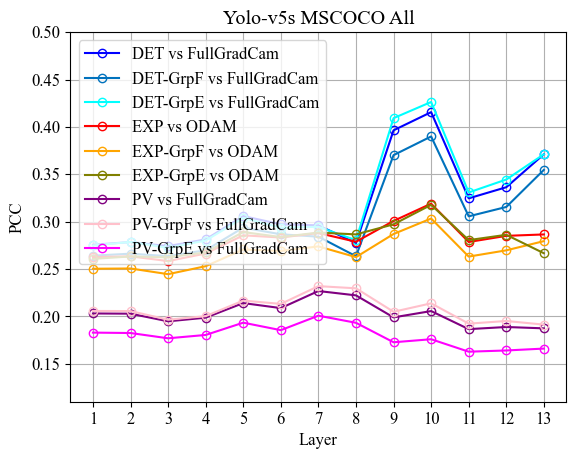

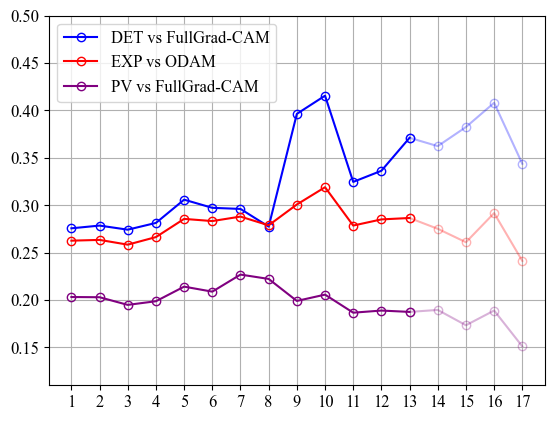

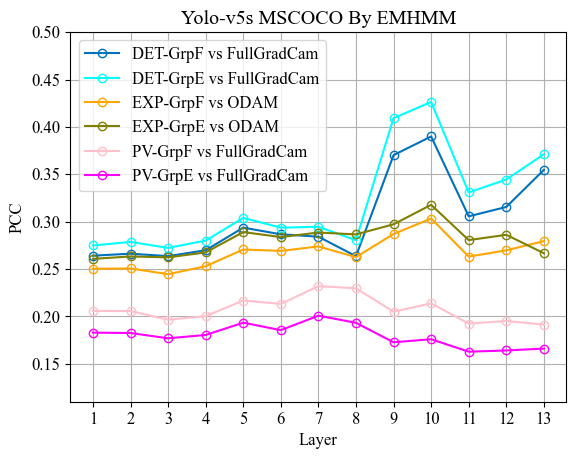

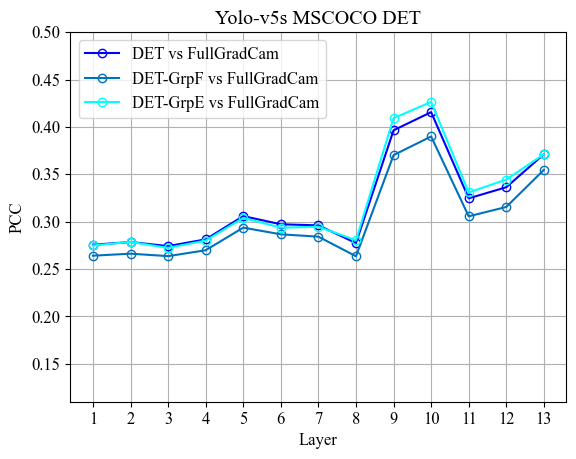

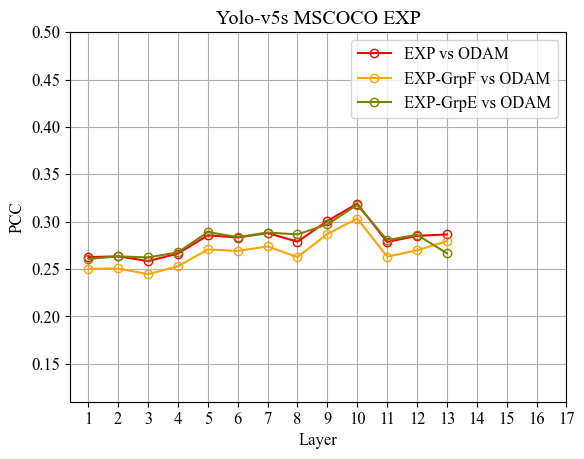

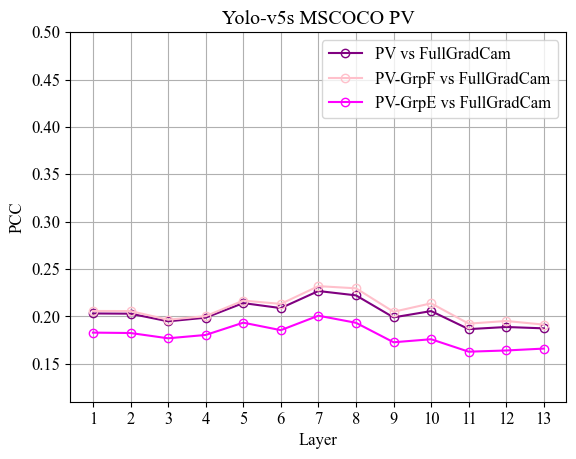

In [89]:
ylims = (0.11,0.5)

#All in one
plt.figure()
plt.grid()
plt.xlabel('Layer')
plt.ylabel('PCC')
for analysis in PCC_all.keys():
    plt.plot(PCC_sorted[analysis].index[::-1][0:13], PCC_sorted[analysis].values[0:13], marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
plt.xticks(PCC_sorted[analysis].index[::-1][0:13])
plt.ylim(ylims)
plt.title(f"Yolo-v5s MSCOCO All")
plt.legend()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/mscoco_all')
plt.show()

# Overall similarity
plt.figure()
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.grid()
# plt.xlabel('Layer')
# plt.ylabel('PCC')
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    plt.plot(PCC_sorted[analysis].index[::-1][0:13], PCC_sorted[analysis].values[0:13], marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
    # plt.plot(PCC_sorted[analysis].index[::-1][12:18], PCC_sorted[analysis].values[12:18], marker='o',fillstyle='none',c=color_code[analysis],alpha=alpha)
plt.xticks(PCC_sorted[analysis].index[::-1])
plt.ylim(ylims)
# plt.title(f"Yolo-v5s MSCOCO")
plt.legend(labels=['DET vs FullGrad-CAM','EXP vs ODAM','PV vs FullGrad-CAM'],fontsize=12)
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    plt.plot(PCC_sorted[analysis].index[::-1][12:18], PCC_sorted[analysis].values[12:18], marker='o',fillstyle='none',label=analysis,c=color_code[analysis],alpha=alpha)
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/mscoco_by_tasks',
            dpi=300)
plt.show()

# Grouped by EMHMM
plt.figure()
plt.grid()
plt.xlabel('Layer')
plt.ylabel('PCC')
for analysis in ['DET-GrpF vs FullGradCam','DET-GrpE vs FullGradCam','EXP-GrpF vs ODAM', 'EXP-GrpE vs ODAM', 'PV-GrpF vs FullGradCam', 'PV-GrpE vs FullGradCam']:
    plt.plot(PCC_sorted[analysis].index[::-1][0:13], PCC_sorted[analysis].values[0:13], marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
plt.xticks(PCC_sorted[analysis].index[::-1][0:13])
plt.ylim(ylims)
plt.title(f"Yolo-v5s MSCOCO By EMHMM")
plt.legend()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/mscoco_by_emhmm')
plt.show()

# DET
plt.figure()
plt.grid()
plt.xlabel('Layer')
plt.ylabel('PCC')
for analysis in ['DET vs FullGradCam','DET-GrpF vs FullGradCam','DET-GrpE vs FullGradCam']:
    plt.plot(PCC_sorted[analysis].index[::-1][0:13], PCC_sorted[analysis].values[0:13], marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
plt.xticks(PCC_sorted[analysis].index[::-1][0:13])
plt.ylim(ylims)
plt.title(f"Yolo-v5s MSCOCO DET")
plt.legend()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/mscoco_DET')
plt.show()

# EXP
plt.figure()
plt.grid()
plt.xlabel('Layer')
plt.ylabel('PCC')
for analysis in ['EXP vs ODAM','EXP-GrpF vs ODAM','EXP-GrpE vs ODAM']:
    plt.plot(PCC_sorted[analysis].index[::-1][0:13], PCC_sorted[analysis].values[0:13], marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
plt.xticks(PCC_sorted[analysis].index[::-1])
plt.ylim(ylims)
plt.title(f"Yolo-v5s MSCOCO EXP")
plt.legend()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/mscoco_EXP')
plt.show()

# PV
plt.figure()
plt.grid()
plt.xlabel('Layer')
plt.ylabel('PCC')
for analysis in ['PV vs FullGradCam','PV-GrpF vs FullGradCam','PV-GrpE vs FullGradCam']:
    plt.plot(PCC_sorted[analysis].index[::-1][0:13], PCC_sorted[analysis].values[0:13], marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
plt.xticks(PCC_sorted[analysis].index[::-1][0:13])
plt.ylim(ylims)
plt.title(f"Yolo-v5s MSCOCO PV")
plt.legend()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/mscoco_PV')
plt.show()


## Bar Scatter Plot

In [6]:
focused_analysis = ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']

In [91]:
backbone_pcc_mean = [np.average(backbone_pcc[analysis]) for analysis in focused_analysis]
neck_pcc_mean = [np.average(neck_pcc[analysis]) for analysis in focused_analysis]

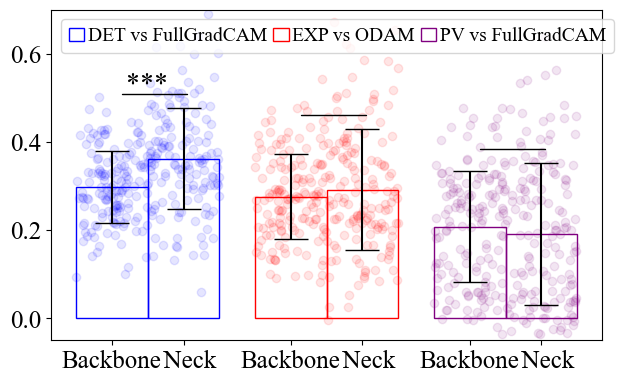

In [78]:
# Bar scatter plot
# x = np.arange(len(focused_analysis))  # the label locations
width = 0.4  # the width of the bars
np.random.seed(123)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 10

fig, ax = plt.subplots(layout='constrained')

x_labels = ['Backbone','  Neck','Backbone','  Neck','Backbone','  Neck']
x_labels_loc = []

multiplier1 = 0
offset1 = width * multiplier1

multiplier2 = 1
offset2 = width * multiplier2

# Backbone
for x, analysis in enumerate(focused_analysis):
    # Backbone
    backbone_value = float(np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    rects = ax.bar(x + offset1, 
                   backbone_value,
                   yerr=float(np.format_float_positional(np.std(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')), 
                   capsize=12,
                   width=width, 
                   color=(0,0,0,0), 
                   edgecolor=color_code[analysis], 
                   label=analysis)
    x_labels_loc.append(x+offset1)
    x_labels_loc.append(x+offset2)
    # ax.bar_label(rects, padding=3)

for x, analysis in enumerate(focused_analysis):
    # Neck
    neck_value = float(np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    rects = ax.bar(x + offset2, 
                neck_value,
                yerr=float(np.format_float_positional(np.std(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')), 
                capsize=12,
                width=width, 
                color=(0,0,0,0), 
                edgecolor=color_code[analysis], 
                label=analysis)
    # ax.bar_label(rects, padding=3)

ax.legend(labels=['DET vs FullGradCAM','EXP vs ODAM','PV vs FullGradCAM'],
            loc='upper left', ncols=3, 
            fontsize=14,
            handletextpad=0.2,
            columnspacing=0.3,
            handlelength=0.8)
# ax.legend(handletextpad=0.5)

for x, analysis in enumerate(focused_analysis):
    ax.scatter(x + np.random.random(len(backbone_pcc[analysis])) * width - width / 2, backbone_pcc[analysis], color=color_code[analysis],alpha=0.1)
    ax.scatter(x + offset2 + np.random.random(len(neck_pcc[analysis])) * width - width / 2, neck_pcc[analysis], color=color_code[analysis],alpha=0.1)

for x, analysis in enumerate(focused_analysis):
    # Backbone
    backbone_value = float(np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    backbone_height = backbone_value + 0.9 * np.std(backbone_pcc[analysis])
    neck_value = float(np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    neck_height = neck_value + 0.9 * np.std(neck_pcc[analysis])

    if p_values[analysis] < 0.001: text = "  ***"
    elif p_values[analysis] < 0.01: text = "  **"
    elif p_values[analysis] < 0.05: text = "  *"
    else: text  = ''
    # else: text = f"p = {p_values[analysis]}"
    def label_diff(i,j,text,X,Y):
        x = (X[i]+X[j])/2
        y = 1.1*max(Y[i], Y[j])
        dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                    'shrinkA':20,'shrinkB':20,'linewidth':1}
        ax.annotate(text, xy=(X[i]*8,y), zorder=10, fontsize=20)
        ax.annotate('', xy=(X[i],y*0.88), xytext=(X[j],y*0.88), arrowprops=props,ha='center')

    label_diff(0,1,text,[x+offset1*0.8,x+offset2*1.2],[backbone_height,neck_height])

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('PCC',fontsize=20, fontname='Times New Roman Bold')
# ax.set_title('Yolo-v5s MSCOCO',fontsize=20,fontname='Times New Roman Bold')
ax.set_xticks(x_labels_loc, x_labels)
ax.tick_params(labelsize=18)
ax.set_ylim(-0.05, 0.7)

ratio = 0.6
xleft, xright = ax.get_xlim()
ybottom, ytop = ax.get_ylim()
ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

plt.show()
fig.savefig(f'/mnt/h/jinhan/xai/results/mscoco/mscoco_bar_scatter_plot')

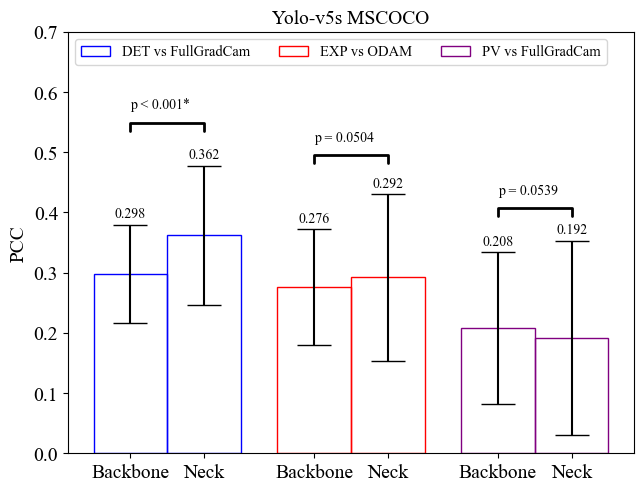

<Figure size 640x480 with 0 Axes>

In [93]:
# Bar scatter plot
# x = np.arange(len(focused_analysis))  # the label locations
width = 0.4  # the width of the bars
np.random.seed(123)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 10

fig, ax = plt.subplots(layout='constrained')

x_labels = ['Backbone','Neck','Backbone','Neck','Backbone','Neck']
x_labels_loc = []

multiplier1 = 0
offset1 = width * multiplier1

multiplier2 = 1
offset2 = width * multiplier2

# Backbone
for x, analysis in enumerate(focused_analysis):
    # Backbone
    backbone_value = float(np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    rects = ax.bar(x + offset1, 
                   backbone_value,
                   yerr=float(np.format_float_positional(np.std(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')), 
                   capsize=12,
                   width=width, 
                   color=(0,0,0,0), 
                   edgecolor=color_code[analysis], 
                   label=analysis)
    x_labels_loc.append(x+offset1)
    x_labels_loc.append(x+offset2)
    ax.bar_label(rects, padding=3)

for x, analysis in enumerate(focused_analysis):
    # Neck
    neck_value = float(np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    rects = ax.bar(x + offset2, 
                neck_value,
                yerr=float(np.format_float_positional(np.std(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k')), 
                capsize=12,
                width=width, 
                color=(0,0,0,0), 
                edgecolor=color_code[analysis], 
                label=analysis)
    ax.bar_label(rects, padding=3)

ax.legend(labels=focused_analysis, loc='upper left', ncols=3, fontsize=10.5)

# for x, analysis in enumerate(focused_analysis):
#     ax.scatter(x + np.random.random(len(backbone_pcc[analysis])) * width - width / 2, backbone_pcc[analysis], color=color_code[analysis],alpha=0.1)
#     ax.scatter(x + offset2 + np.random.random(len(neck_pcc[analysis])) * width - width / 2, neck_pcc[analysis], color=color_code[analysis],alpha=0.1)

for x, analysis in enumerate(focused_analysis):
    # Backbone
    backbone_value = float(np.format_float_positional(np.average(backbone_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    backbone_height = backbone_value + 0.9 * np.std(backbone_pcc[analysis])
    neck_value = float(np.format_float_positional(np.average(neck_pcc[analysis]),precision=3, unique=False, fractional=False, trim='k'))
    neck_height = neck_value + 0.9 * np.std(neck_pcc[analysis])

    if p_values[analysis] < 0.001: text = "p < 0.001*"
    elif p_values[analysis] < 0.05: text = f"p = {p_values[analysis]}*"
    else: text = f"p = {p_values[analysis]}"
    def label_diff(i,j,text,X,Y):
        x = (X[i]+X[j])/2
        y = 1.1*max(Y[i], Y[j])
        dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                    'shrinkA':10,'shrinkB':10,'linewidth':2}
        ax.annotate(text, xy=(X[i],y+0.06), zorder=10)
        ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props,ha='center')

    label_diff(0,1,text,[x+offset1,x+offset2],[backbone_height,neck_height])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PCC',fontsize=14)
ax.set_title('Yolo-v5s MSCOCO',fontsize=14)
ax.set_xticks(x_labels_loc, x_labels)
ax.tick_params(labelsize=14)
ax.set_ylim(top=0.7)

plt.show()
plt.savefig(f'/mnt/h/jinhan/xai/results/mscoco/mscoco_bar_scatter_plot')

## Change Point Detection

In [18]:
PCC_sorted[analysis].index[::-1]

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

In [12]:
PCC_sorted[analysis]

17    0.275624
16    0.278510
15    0.274191
14    0.281319
13    0.305857
12    0.297249
11    0.296084
10    0.277418
9     0.396386
8     0.415565
7     0.324603
6     0.336340
5     0.371127
4     0.362343
3     0.382474
2     0.408054
1     0.343751
dtype: float64

In [11]:
PCC_sorted[analysis].values

array([0.27562363, 0.27850977, 0.27419121, 0.28131896, 0.30585739,
       0.29724889, 0.29608386, 0.27741841, 0.39638555, 0.41556511,
       0.32460294, 0.33633972, 0.37112747, 0.36234292, 0.38247403,
       0.40805444, 0.34375141])

[10, 13]
[10, 13]
[10, 13]


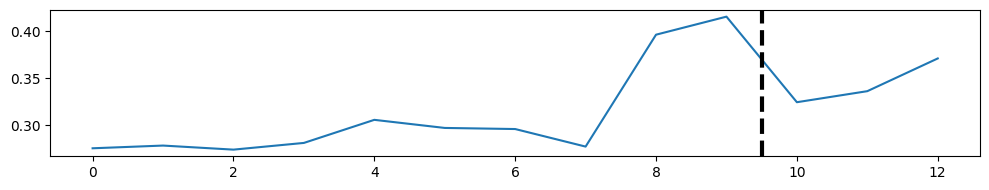

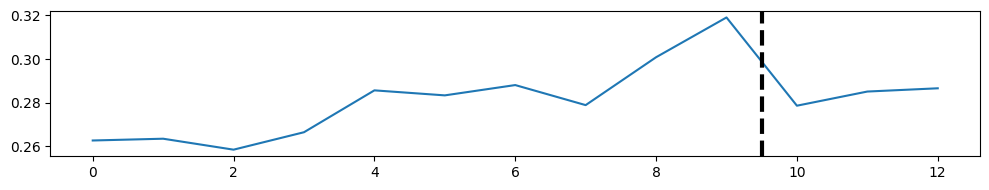

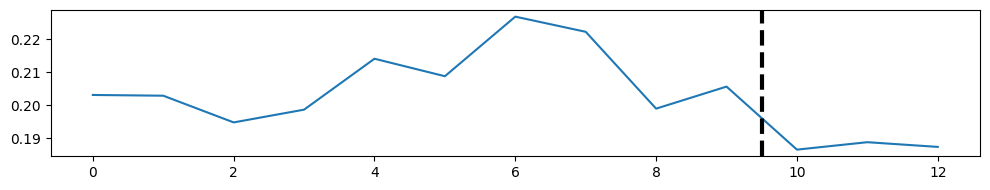

In [62]:
import ruptures as rpt

CPD_result = defaultdict(list)
algo = rpt.Pelt(model="rbf",min_size=1)
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    algo.fit(PCC_sorted[analysis].values[0:13])
    result = algo.predict(pen=1)
    CPD_result[analysis] = result
    print(result)
    rpt.display(PCC_sorted[analysis].values[0:13],[],result)

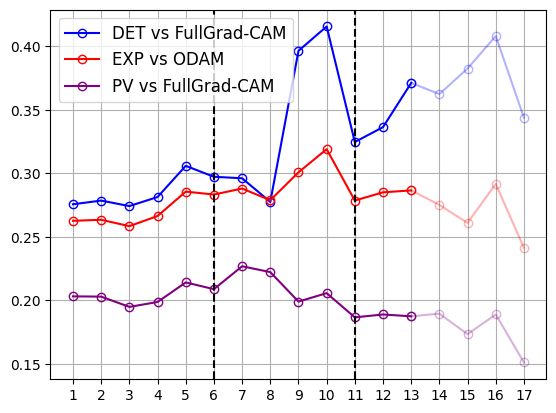

In [52]:
# Overall similarity
plt.figure()
plt.grid()
# plt.xlabel('Layer')
# plt.ylabel('PCC')
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    plt.plot(PCC_sorted[analysis].index[::-1][0:13], PCC_sorted[analysis].values[0:13], marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
    # plt.plot(PCC_sorted[analysis].index[::-1][12:18], PCC_sorted[analysis].values[12:18], marker='o',fillstyle='none',c=color_code[analysis],alpha=alpha)
plt.xticks(PCC_sorted[analysis].index[::-1])
# plt.ylim(ylims)
# plt.title(f"Yolo-v5s MSCOCO")
plt.legend(labels=['DET vs FullGrad-CAM','EXP vs ODAM','PV vs FullGrad-CAM'],fontsize=12)
for bkp in CPD_result['DET vs FullGradCam'][:-1]:
    plt.axvline(x=bkp+1,color='k',linestyle='--')
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    plt.plot(PCC_sorted[analysis].index[::-1][12:18], PCC_sorted[analysis].values[12:18], marker='o',fillstyle='none',label=analysis,c=color_code[analysis],alpha=alpha)
plt.show()

In [53]:
PCC_all

{'DET vs FullGradCam': defaultdict(collections.defaultdict,
             {1: defaultdict(None,
                          {'airplane_167540': 0.8378124523903845,
                           'apple_216277': 0.3856789854519755,
                           'apple_562059': 0.25595962489622415,
                           'backpack_177065': 0.8903853331270717,
                           'backpack_370478': 0.7989195771553138,
                           'banana_279769': 0.1557120894642591,
                           'banana_290619': 0.03512699358520926,
                           'baseball bat_129945': 0.5363928935291364,
                           'baseball bat_270474': 0.28001940937356073,
                           'baseball glove_162415': 0.043673546855046964,
                           'baseball glove_515982': 0.7413414681695025,
                           'bear_519611': 0.5785541557401092,
                           'bear_521231': 0.6041276559139781,
                           'bed_468245':

## paired-t test

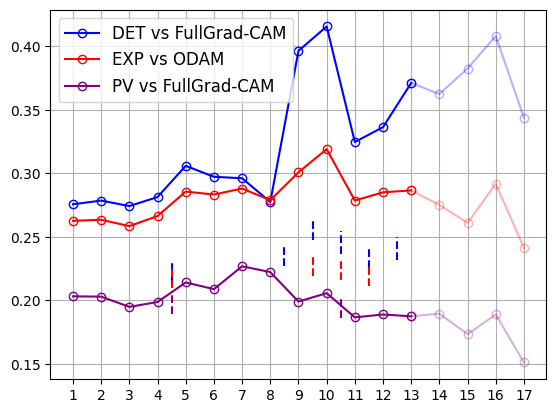

In [22]:
# Overall similarity
plt.figure()
plt.grid()
# plt.xlabel('Layer')
# plt.ylabel('PCC')
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    plt.plot(PCC_sorted[analysis].index[::-1][0:13], PCC_sorted[analysis].values[0:13], marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
    # plt.plot(PCC_sorted[analysis].index[::-1][12:18], PCC_sorted[analysis].values[12:18], marker='o',fillstyle='none',c=color_code[analysis],alpha=alpha)
plt.xticks(PCC_sorted[analysis].index[::-1])
# plt.ylim(ylims)
# plt.title(f"Yolo-v5s MSCOCO")
plt.legend(labels=['DET vs FullGrad-CAM','EXP vs ODAM','PV vs FullGrad-CAM'],fontsize=12)

shift = 0.5
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    for point in change_points[analysis]:
        ylevel = ( PCC_sorted[analysis][point] + PCC_sorted[analysis][point+1] ) / 2
        plt.axvline(x=18-point-shift,ymin=ylevel-0.03,ymax=ylevel+0.03,color=color_code[analysis],linestyle='--')
    # shift -= 0.11
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    plt.plot(PCC_sorted[analysis].index[::-1][12:18], PCC_sorted[analysis].values[12:18], marker='o',fillstyle='none',label=analysis,c=color_code[analysis],alpha=alpha)
plt.show()

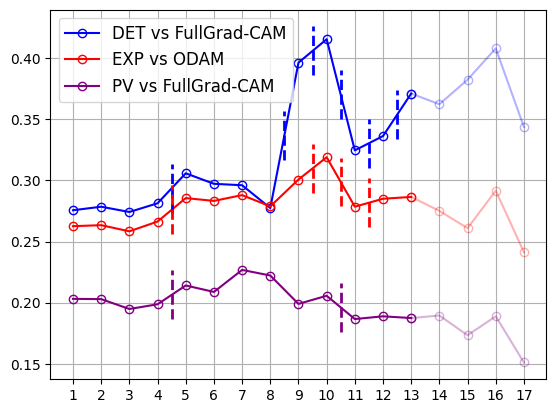

In [32]:
# Overall similarity
plt.figure()
plt.grid()
# plt.xlabel('Layer')
# plt.ylabel('PCC')
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    plt.plot(PCC_sorted[analysis].index[::-1][0:13], PCC_sorted[analysis].values[0:13], marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
    # plt.plot(PCC_sorted[analysis].index[::-1][12:18], PCC_sorted[analysis].values[12:18], marker='o',fillstyle='none',c=color_code[analysis],alpha=alpha)
plt.xticks(PCC_sorted[analysis].index[::-1])
# plt.ylim(ylims)
# plt.title(f"Yolo-v5s MSCOCO")
plt.legend(labels=['DET vs FullGrad-CAM','EXP vs ODAM','PV vs FullGrad-CAM'],fontsize=12)

shift = 0.5
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    for point in change_points[analysis]:
        ylevel = ( PCC_sorted[analysis][point] + PCC_sorted[analysis][point+1] ) / 2
        plt.plot([18-point-shift,18-point-shift],[ylevel-0.02,ylevel+0.02],color=color_code[analysis],linestyle='--',linewidth=2)
    # shift -= 0.11
        
for analysis in ['DET vs FullGradCam','EXP vs ODAM','PV vs FullGradCam']:
    plt.plot(PCC_sorted[analysis].index[::-1][12:18], PCC_sorted[analysis].values[12:18], marker='o',fillstyle='none',label=analysis,c=color_code[analysis],alpha=alpha)
plt.show()

In [31]:
results['PV vs FullGradCam'][9]

TtestResult(statistic=-1.4881760884079724, pvalue=0.13890636739040862, df=143)

In [18]:
change_points

defaultdict(list,
            {'DET vs FullGradCam': [5, 6, 7, 8, 9, 13],
             'EXP vs ODAM': [6, 7, 8, 13],
             'PV vs FullGradCam': [7, 13]})